In [71]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
census = pd.read_csv('C:\\Users\\maha.jayapal\\Downloads\\census.csv')

In [22]:
census.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [5]:
census.shape

(48842, 15)

In [6]:
census.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [7]:
census.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
from pandas.api.types import is_numeric_dtype

for col in census.columns:
    if is_numeric_dtype(census[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % census[col].mean())
        print('\t Standard deviation = %.2f' % census[col].std())
        print('\t Minimum = %.2f' % census[col].min())
        print('\t Maximum = %.2f' % census[col].max())

age:
	 Mean = 38.64
	 Standard deviation = 13.71
	 Minimum = 17.00
	 Maximum = 90.00
fnlwgt:
	 Mean = 189664.13
	 Standard deviation = 105604.03
	 Minimum = 12285.00
	 Maximum = 1490400.00
education-num:
	 Mean = 10.08
	 Standard deviation = 2.57
	 Minimum = 1.00
	 Maximum = 16.00
capital-gain:
	 Mean = 1079.07
	 Standard deviation = 7452.02
	 Minimum = 0.00
	 Maximum = 99999.00
capital-loss:
	 Mean = 87.50
	 Standard deviation = 403.00
	 Minimum = 0.00
	 Maximum = 4356.00
hours-per-week:
	 Mean = 40.42
	 Standard deviation = 12.39
	 Minimum = 1.00
	 Maximum = 99.00


Age ranges from 17 to 90. 

In [9]:
census['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [10]:
census['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

There is a unknown working class of 2799 values. We can combine the state gov and fed gov as gov.employed, not sure what does local-gov mean.

In [25]:
census['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [26]:
census['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [27]:
census['sex'].value_counts()

Male      32650
Female    16192
Name: sex, dtype: int64

In [28]:
census['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

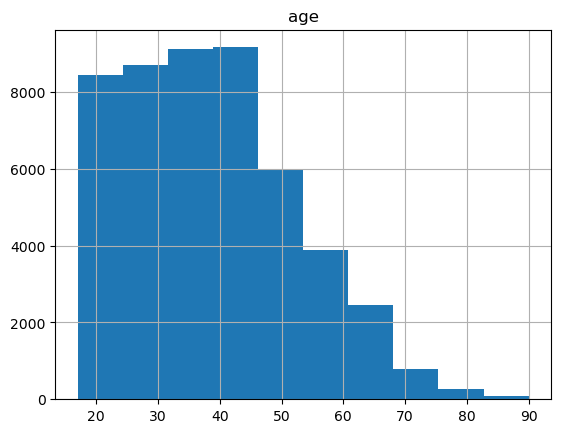

In [30]:
census.hist(column='age')

<AxesSubplot:xlabel='sex', ylabel='count'>

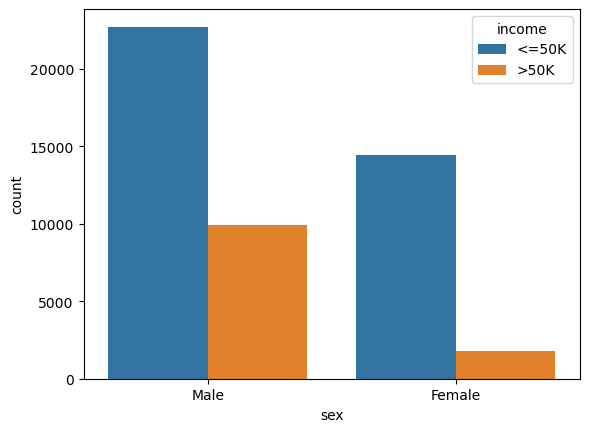

In [10]:
sns.countplot(x='sex', hue='income', data = census)

<AxesSubplot:xlabel='race', ylabel='count'>

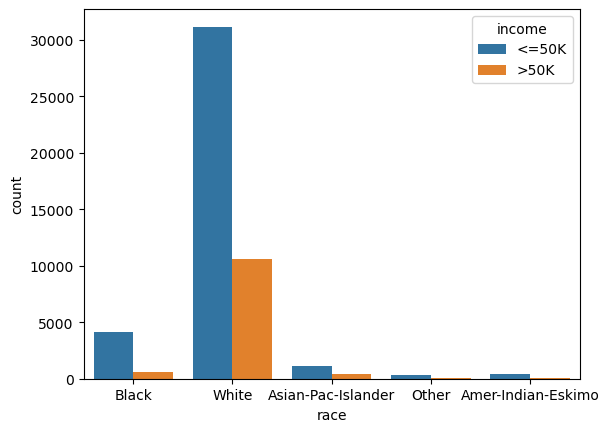

In [11]:
sns.countplot(x='race', hue='income', data = census)

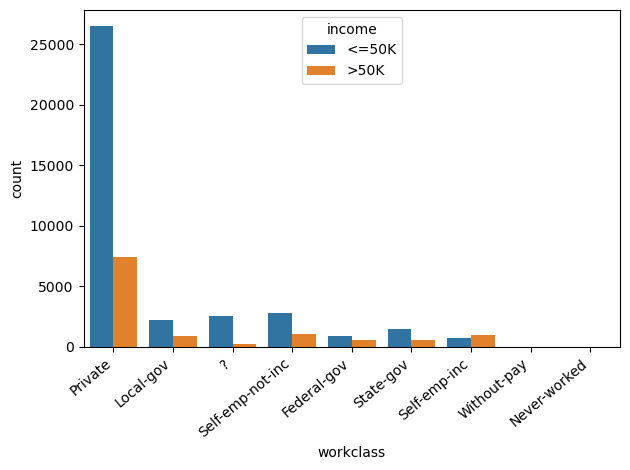

In [16]:
ax = sns.countplot(x='workclass' , hue='income', data = census)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [38]:
len(census[(census['workclass']=='?') & (census['income']=='>50K')])

265

In [39]:
len(census[(census['workclass']=='?') & (census['income']=='<=50K')])

2534

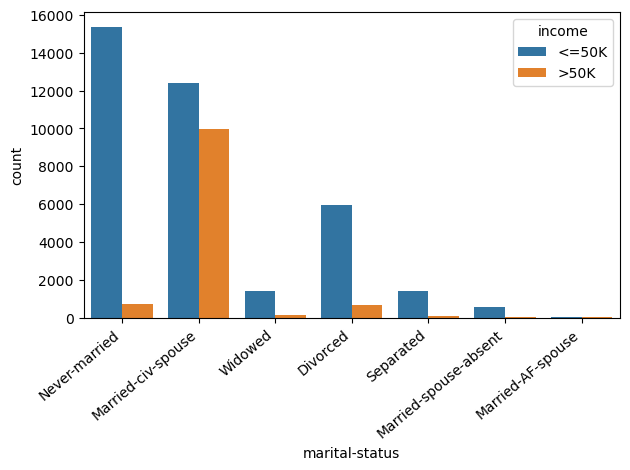

In [17]:
ax = sns.countplot(x='marital-status' , hue='income', data = census)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Pre-processing

Combining the rows in the marial-status of Married-civ-spouse, Married-spouse-absent, and Married-AF-spouse to Married

In [24]:
census['marital-status'] = census['marital-status'].replace({'Married-civ-spouse': 'Married', 
                                  'Married-spouse-absent': 'Married', 
                                  'Married-AF-spouse': 'Married'})

In [26]:
census['marital-status'].value_counts()

Married          23044
Never-married    16117
Divorced          6633
Separated         1530
Widowed           1518
Name: marital-status, dtype: int64

In [54]:
census['workclass'] = census['workclass'].replace({'Local-gov': 'Government', 
                                                   'Federal-gov': 'Government', 
                                                   'State-gov': 'Government',
                                                   'Self-emp-not-inc': 'Self-emp',
                                                   'Self-emp-inc': 'Self-emp',
                                                   'Without-pay': 'No-income',
                                                   'Never-worked': 'No-income',
                                                   '?': 'Unknown'})

In [42]:
census['workclass'].value_counts()

Private       33906
Government     6549
Self-emp       5557
Unknown        2799
No-income        31
Name: workclass, dtype: int64

In [69]:
census['native-country'] = np.where((census['native-country'] != 'United-States') & 
                                    (census['native-country'] != '?'), 'Non-US', census['native-country'])
census['native-country'] = census['native-country'].replace({'?': 'Unknown'})

In [70]:
census['native-country'].value_counts()

United-States    43832
Non-US            4153
Unknown            857
Name: native-country, dtype: int64